In [5]:
from torch.utils.data import Dataset, DataLoader, random_split
from PIL import Image
import torch 
from torchmetrics import F1Score
import torchvision
from torchvision.datasets import ImageFolder
from torchvision import transforms
import torchvision
from torchvision.transforms import Resize
import helper
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shutil
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm
import os
from torch.utils.data import RandomSampler, DataLoader, Subset, SubsetRandomSampler, RandomSampler


from Net import *
from Model import *
from PlanktonLoader import *
from Plot import *

%load_ext autoreload
%autoreload 2

In [12]:
# pre-processing
data_folder = '../ZooScanSet'
saving_location = '../Saving_Output/'
# data_folder = '/Users/nounou/Desktop/EPFL/M5/Project I/Code/ZooScanSet'
image_size = (128,128)
normalize = ((0.5), (0.5))
unwanted_classes = ['seaweed','badfocus__Copepoda','artefact','badfocus__artefact','bubble','detritus','fiber__detritus','egg__other','multiple__other']
transform = transforms.Compose([transforms.Resize(image_size),transforms.ToTensor(), transforms.Normalize(*normalize)])

dataset = PlanktonLoader(data_folder+'/taxa.csv', data_folder+"/imgs/", unwanted_classes ,transform)

#sampling and train-test split
sampling_factor = .01
train_factor = .8
shuffle = True
random_seed= 42
batch_size = 16

trainloader_dataset, testloader_dataset = PlanktonLoader.build_loaders(dataset, sampling_factor, train_factor, batch_size, random_seed= 41, shuffle_dataset= True)


 The id list has a lenght of  703821
oops identation broken, the following differs between the list of directories and the class list
[]
['.DS_Store']
We have  84 classes
We use  0.01 of the data ( 7038 samples) and the train factor is  0.8
Train set contains 5630 images.
Test set contains 1408 images.


In [7]:
num_epochs = 8
lr = 0.001
opt_func = torch.optim.Adam
net = Net()
net.initialize_weights()
model = ImageClassificationBase()

history = ImageClassificationBase.fit(model, num_epochs, lr, net, trainloader_dataset, testloader_dataset, opt_func)


<generator object Module.parameters at 0x1648610b0>
Epoch [0], train_loss: 2.5371, val_loss: 2.3294, val_acc: 0.4126,  val_f1_score: 0.4126
Epoch [1], train_loss: 2.0147, val_loss: 2.3855, val_acc: 0.4219,  val_f1_score: 0.4219
Epoch [2], train_loss: 1.6985, val_loss: 2.2876, val_acc: 0.4808,  val_f1_score: 0.4808
Epoch [3], train_loss: 1.3580, val_loss: 2.3468, val_acc: 0.5014,  val_f1_score: 0.5014
Epoch [4], train_loss: 1.0623, val_loss: 2.5373, val_acc: 0.5000,  val_f1_score: 0.5000
Epoch [5], train_loss: 0.8160, val_loss: 2.7853, val_acc: 0.4830,  val_f1_score: 0.4830
Epoch [6], train_loss: 0.6404, val_loss: 3.0520, val_acc: 0.4936,  val_f1_score: 0.4936
Epoch [7], train_loss: 0.4987, val_loss: 3.4566, val_acc: 0.4609,  val_f1_score: 0.4609


FileNotFoundError: [Errno 2] No such file or directory: '../Saving_Output/last_model.pth'

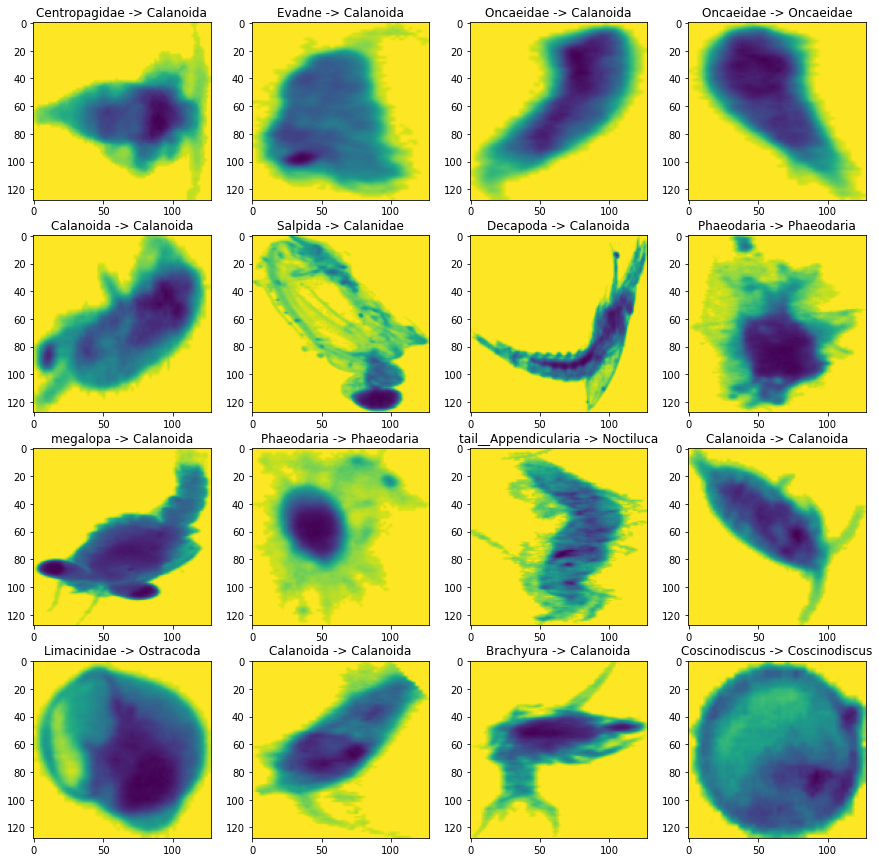

7 good predictions. Accuracy :  0.4375


In [21]:
torch.save(net.state_dict(), saving_location+'/last_model.pth')
Plot.plot_random_output(testloader_dataset, dataset, net, saving_location+'random_preds.png')


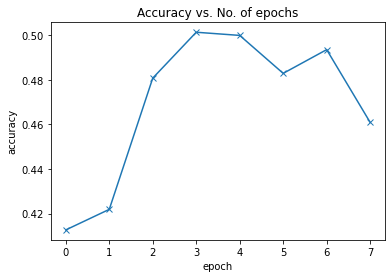

In [22]:
Plot.plot_accuracies(history, saving_location+'accuracy(e).png')

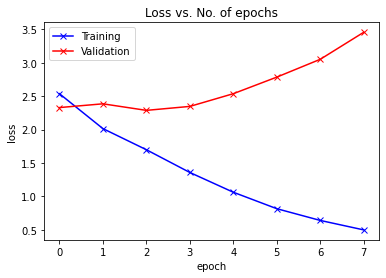

In [23]:
Plot.plot_losses(history, saving_location+'losses.png')


In [26]:
df = Plot.class_accuracies(Plot, net, dataset, testloader_dataset, saving_location+'class_acc.csv')


Class # 0   Neoceratium trained on 32 times -> accuracy : 0.34375
Class # 1   Noctiluca trained on 192 times -> accuracy : 0.5520833333333334
Class # 2   Phaeodaria trained on 560 times -> accuracy : 0.4857142857142857
Class # 3   Acantharea was never trained on
Class # 4   Foraminifera trained on 256 times -> accuracy : 0.46875
Class # 5   Spumellaria was never trained on
Class # 6   Coscinodiscus trained on 368 times -> accuracy : 0.48097826086956524
Class # 7   Annelida trained on 16 times -> accuracy : 0.5625
Class # 8   larvae__Annelida was never trained on
Class # 9   Tomopteridae was never trained on
Class # 10   Evadne trained on 512 times -> accuracy : 0.4765625
Class # 11   Podon trained on 16 times -> accuracy : 0.375
Class # 12   Penilia trained on 272 times -> accuracy : 0.5036764705882353
Class # 13   larvae__Crustacea was never trained on
Class # 14   Gammaridea was never trained on
Class # 15   Hyperiidea trained on 48 times -> accuracy : 0.3958333333333333
Class # 16  